In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10, 6)
import theano
import theano.tensor as T
import cPickle as pickle
import os
load_path = '../../final_saved/boston/gaus3/'
data_path = '../../../data/boston'
from plot_style import init_rc_params
init_rc_params()

Using gpu device 0: GeForce 820M (CNMeM is disabled, cuDNN not available)


heatmap

In [3]:
for f in os.listdir(load_path):
    print f
    with open(os.path.join(load_path, f), 'rb') as inp:
        
            data = pickle.load(inp)
            print data['validation'][-1]
            

2.5e-05_1000.0.pckl
-10504.5525661
1e-05_10000000.0.pckl
-11242.4625826
5e-05_10.0.pckl
-5653.67149775
5e-05_1000000000.0.pckl
-5367.45255248
2.5e-06_10000000.0.pckl
-12975.0786242
1e-06_100000.0.pckl
-16141.0516498
5e-05_10000000.0.pckl
-6342.30741116
1e-06_10.0.pckl
-16073.865006
1e-05_10.0.pckl
-12670.5056897
5e-06_100000.0.pckl
-11095.8433808
2.5e-06_1000.0.pckl
-12506.4710932
2.5e-06_1000000000.0.pckl
-13734.7333702
5e-06_1000.0.pckl
-13917.762918
2.5e-05_10.0.pckl
-10590.26801
2.5e-06_100000.0.pckl
-14289.7910853
2.5e-06_10.0.pckl
-15143.3526377
5e-06_10000000.0.pckl
-12887.5483561
2.5e-05_1000000000.0.pckl
-10573.0500167
2.5e-05_100000.0.pckl
-11173.2444037
5e-06_1000000000.0.pckl
-11980.8422206
2.5e-05_10000000.0.pckl
-11573.8425742
1e-05_100000.0.pckl
-11657.7289392
5e-05_1000.0.pckl
-6277.60190232
5e-05_100000.0.pckl
-5598.85872092
1e-06_1000.0.pckl
-14410.9453287
1e-05_1000.0.pckl
-11705.315472
1e-06_10000000.0.pckl
-16811.8894042
1e-06_1000000000.0.pckl
-16105.9679771
1e-05

2.5e-05_1000.0.pckl
1e-05_10000000.0.pckl
5e-05_10.0.pckl
5e-05_1000000000.0.pckl
2.5e-06_10000000.0.pckl
1e-06_100000.0.pckl
5e-05_10000000.0.pckl
1e-06_10.0.pckl
1e-05_10.0.pckl
5e-06_100000.0.pckl
2.5e-06_1000.0.pckl
2.5e-06_1000000000.0.pckl
5e-06_1000.0.pckl
2.5e-05_10.0.pckl
2.5e-06_100000.0.pckl
2.5e-06_10.0.pckl
5e-06_10000000.0.pckl
2.5e-05_1000000000.0.pckl
2.5e-05_100000.0.pckl
5e-06_1000000000.0.pckl
2.5e-05_10000000.0.pckl
1e-05_100000.0.pckl
5e-05_1000.0.pckl
5e-05_100000.0.pckl
1e-06_1000.0.pckl
1e-05_1000.0.pckl
1e-06_10000000.0.pckl
1e-06_1000000000.0.pckl
1e-05_1000000000.0.pckl
5e-06_10.0.pckl
best alpha 10.0 lr 2e-06


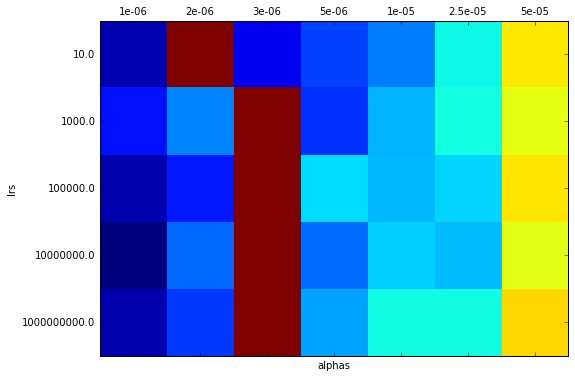

In [14]:
results = []
for f in os.listdir(load_path):
    print f
    with open(os.path.join(load_path, f), 'rb') as inp:
        try:
            data = pickle.load(inp)
            results.append((round(data['lr']*10**6)/10**6, data['alpha'], data['validation'][-1]))
        except:
            print 'bad'
        
alphas = sorted(list(set([r[1] for r in results])))
lrs = sorted(list(set([r[0] for r in results])))
matrix = np.zeros((len(alphas), len(lrs)))
for r in results:
    lr_id = lrs.index(r[0])
    a_id = alphas.index(r[1])
    q = r[2]
    matrix[a_id, lr_id] = q
fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(matrix)
plt.xlabel('alphas')
plt.ylabel('lrs')
ax.set_yticklabels(['']+  [str(a) for a in alphas])
ax.set_xticklabels([''] + [str(l) for l in lrs])
best = np.where(matrix == np.max(matrix))
print 'best', 'alpha', alphas[best[0][0]], 'lr', lrs[best[1][0]]

In [13]:
print [round(l*10**6) for l in lrs]

[1.0, 1.0, 2.0, 3.0, 5.0, 5.0, 10.0, 10.0, 25.0, 25.0, 50.0, 50.0]


convergence

82


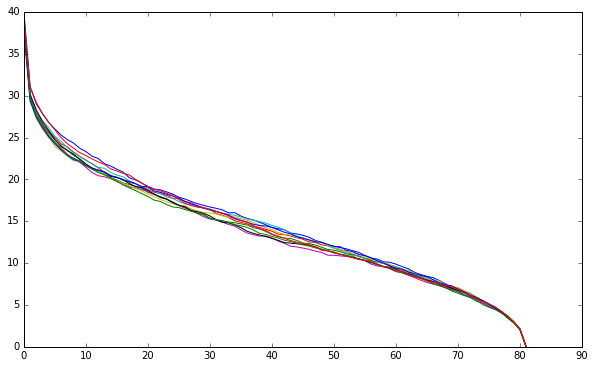

In [30]:
with open(os.path.join(load_path, '1e-05_10.0.pckl')) as inp:
    data = pickle.load(inp)
print len(data['params'])
optima = data['params'][-1]
convs = [[] for _ in range(len(optima))]
for i in xrange(len(optima)):
    for p in data['params']:
        convs[i].append(np.linalg.norm(p[i]-optima[i]))
    plt.plot(convs[i])

stability (noise in data)

In [2]:
test_x = np.load(os.path.join(data_path, 'test_x.npy'))
test_y = np.load(os.path.join(data_path, 'test_y.npy'))
with open(os.path.join(load_path, '1e-05_10.0.pckl')) as inp:
    data = pickle.load(inp)
if len(data['params'])==10**4:
    params = data['params'][-1]
else:    
    params = data['params'][-6]
param = T.vector()
hidden_num = 50
X = T.matrix()
Y = T.vector()
W1 = param[:test_x.shape[1]*hidden_num].reshape((test_x.shape[1],hidden_num))
b1 = param[-hidden_num-1:-1]
W2 = param[test_x.shape[1]*hidden_num:test_x.shape[1]*hidden_num+hidden_num*1].reshape((hidden_num, 1))
b2 = param[-1:]
hidden = T.tanh(T.dot(X, W1)+b1)
output = T.dot(hidden, W2) + b2
cost = T.mean((output.T - Y)**2)
monitor = theano.function([X,Y,param], cost)
results =[]
results_std = []
for noise_level in range(0,20):
    result = []
    noise = noise_level*1.0/10
    for p in params:
        result.append(monitor(test_x + np.random.randn(test_x.shape[0],test_x.shape[1])*noise, test_y, p))
    results.append(np.mean(result))
    results_std.append(np.std(result))
    print noise, results[-1], results_std[-1]
results = np.array(results)
results_std = np.array(results_std)
plt.fill_between(range(len(results)), results-results_std, results+results_std, alpha=0.5)
plt.plot(range(len(results)), results)


TypeError: ('Bad input argument to theano function with name "<ipython-input-2-2722946c761f>:20"  at index 2(0-based)', 'Wrong number of dimensions: expected 1, got 0 with shape ().')

stability (noise in params)

0.0 40.2514371043 8.92270518584
0.1 43.274635412 11.2377866257
0.2 46.4593531262 10.9185193293
0.3 72.5811938848 43.9495730072
0.4 83.4030131206 29.9517533273
0.5 104.976540902 24.1949222914
0.6 95.0295161455 40.9763490232
0.7 185.964349755 58.1204177615
0.8 153.36895779 45.2503457746
0.9 189.290489492 59.9523646481
1.0 238.518140045 115.707885755
1.1 231.848781967 91.740714769
1.2 295.830817187 186.173902817
1.3 246.683798563 138.195166005
1.4 243.482945845 114.626487032
1.5 361.708948152 179.751760157
1.6 331.824318674 198.127929628
1.7 391.850950194 172.681310638
1.8 276.693433976 113.747622996
1.9 592.461681992 424.155653837


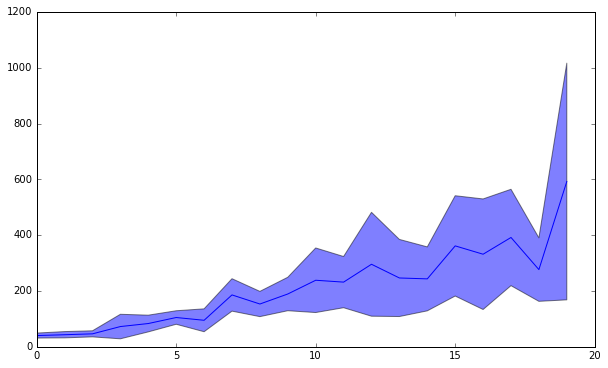

In [32]:
test_x = np.load(os.path.join(data_path, 'test_x.npy'))
test_y = np.load(os.path.join(data_path, 'test_y.npy'))
with open(os.path.join(load_path, '0.001_1000.0.pckl')) as inp:
    data = pickle.load(inp)
if len(data['params'])==10**4:
    params = data['params'][-1]
else:
    params = data['params'][-6]
param = T.vector()
hidden_num = 50
X = T.matrix()
Y = T.vector()
W1 = param[:test_x.shape[1]*hidden_num].reshape((test_x.shape[1],hidden_num))
b1 = param[-hidden_num-1:-1]
W2 = param[test_x.shape[1]*hidden_num:test_x.shape[1]*hidden_num+hidden_num*1].reshape((hidden_num, 1))
b2 = param[-1:]
hidden = T.tanh(T.dot(X, W1)+b1)
output = T.dot(hidden, W2) + b2
cost = T.mean((output.T - Y)**2)
monitor = theano.function([X,Y,param], cost)
results =[]
results_std = []
for noise_level in range(0,20):
    result = []
    noise = noise_level*1.0/10
    for p in params:
        result.append(monitor(test_x, test_y, p  + np.random.randn(p.shape[0])*noise))
    results.append(np.mean(result))
    results_std.append(np.std(result))
    print noise, results[-1], results_std[-1]
results = np.array(results)
results_std = np.array(results_std)
plt.fill_between(range(len(results)), results-results_std, results+results_std, alpha=0.5)
plt.plot(range(len(results)), results)


learning curve

0


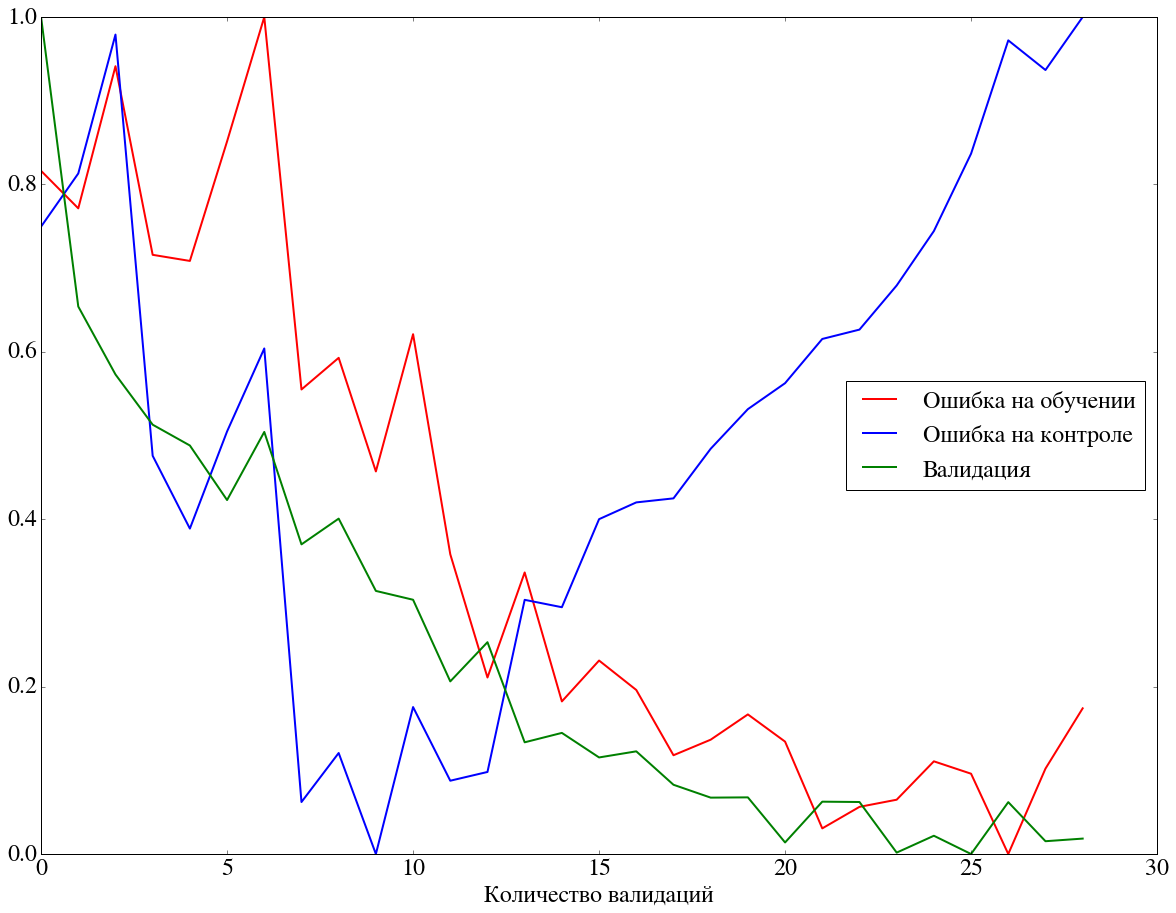

In [6]:
test_x = np.load(os.path.join(data_path, 'test_x.npy'))
test_y = np.load(os.path.join(data_path, 'test_y.npy'))

train_x = np.load(os.path.join(data_path, 'train_x.npy'))
train_y = np.load(os.path.join(data_path, 'train_y.npy'))

results_train, results_test, results_validation = [],[],[]
with open(os.path.join(load_path,'5e-05_1000000000.0.pckl')) as inp:
    data = pickle.load(inp)
all_params = data['params']


param = T.vector()
hidden_num = 50
X = T.matrix()
Y = T.vector()
W1 = param[:test_x.shape[1]*hidden_num].reshape((test_x.shape[1],hidden_num))
b1 = param[-hidden_num-1:-1]
W2 = param[test_x.shape[1]*hidden_num:test_x.shape[1]*hidden_num+hidden_num*1].reshape((hidden_num, 1))
b2 = param[-1:]
hidden = T.log(1 + T.exp(T.dot(X, W1)+b1))
output = T.dot(hidden, W2) + b2
cost = T.sum((output.T - Y)**2)*train_x.shape[0]/X.shape[0]
monitor = theano.function([X,Y,param], cost, allow_input_downcast=True)
results =[]
results_std = []
for i,params in enumerate(all_params):
    if i%50==0:
        print i 
    result_train = []
    result_test = []    
    #for p in range(0,20):
    params = np.asanyarray(params)
    real_params = params[:len(params)/2]      
    real_params = real_params# + np.random.randn(len(params)/2)*np.exp(params[len(params)/2:])
    result_train.append( monitor(train_x, train_y, real_params))
    params = np.asanyarray(params)
    real_params = params[:len(params)/2]      
    real_params = real_params# + np.random.randn(len(params)/2)*np.exp(params[len(params)/2:])
    result_test.append(monitor(test_x, test_y, real_params))
    result_validation = data['validation'][i]
    results_train.append(np.mean(result_train))
    results_test.append((np.mean(result_test)))
    results_validation.append(result_validation)
results_train = np.array(results_train[1:])
results_test = np.array(results_test[1:])
results_validation = -np.array(results_validation[1:])
results_train = (results_train - np.min(results_train)) / ((np.max(results_train) - np.min(results_train)))
results_test = (results_test - np.min(results_test)) / ((np.max(results_test) - np.min(results_test)))
results_validation = (results_validation - np.min(results_validation)) / ((np.max(results_validation) - np.min(results_validation)))
plt.plot(results_train,'r', label= u'Ошибка на обучении')
plt.plot(results_test,'b', label=u'Ошибка на контроле')
plt.plot(results_validation, 'g', label=u'Валидация')
plt.legend(loc='best')
plt.xlabel(u'Количество валидаций', fontsize=24)
